In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [14]:
# generate 20 data points
N = 20

# Set random seed for reproducibility
np.random.seed(42)

#random data on x-axis
x= np.random.rand(N)*10-5

y = 0.5*x -1+ 0.5*np.random.rand(N)

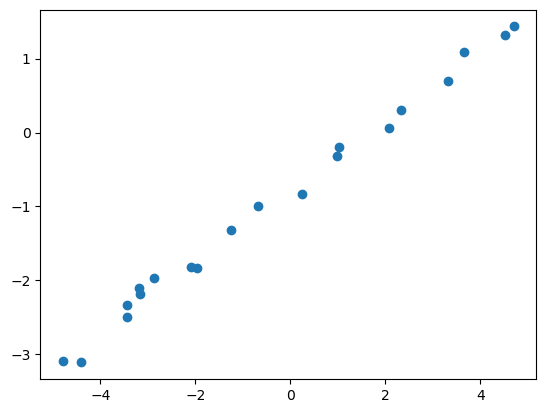

In [15]:
plt.scatter(x,y)

In [16]:
# Define the gradient function
def Gradient(m, b):
    grad_m = 0
    grad_b = 0
    for i in range(N):
        grad_m += -X[i] * (Y[i] - (m * X[i] + b))
        grad_b += -(Y[i] - (m * X[i] + b))
    return grad_m, grad_b

# Initialize m and b
m = 0
b = 0

# Set learning rate and number of iterations
learning_rate = 0.001
iterations = 1000

# Perform gradient descent
for _ in range(iterations):
    grad_m, grad_b = Gradient(m, b)
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

print("Estimated m:", m)
print("Estimated b:", b)


Estimated m: 0.4860476543029485
Estimated b: -0.8921942796543206


Final parameters: m = 0.4860, b = -0.8922
True parameters: m = 0.5000, b = -1.0000


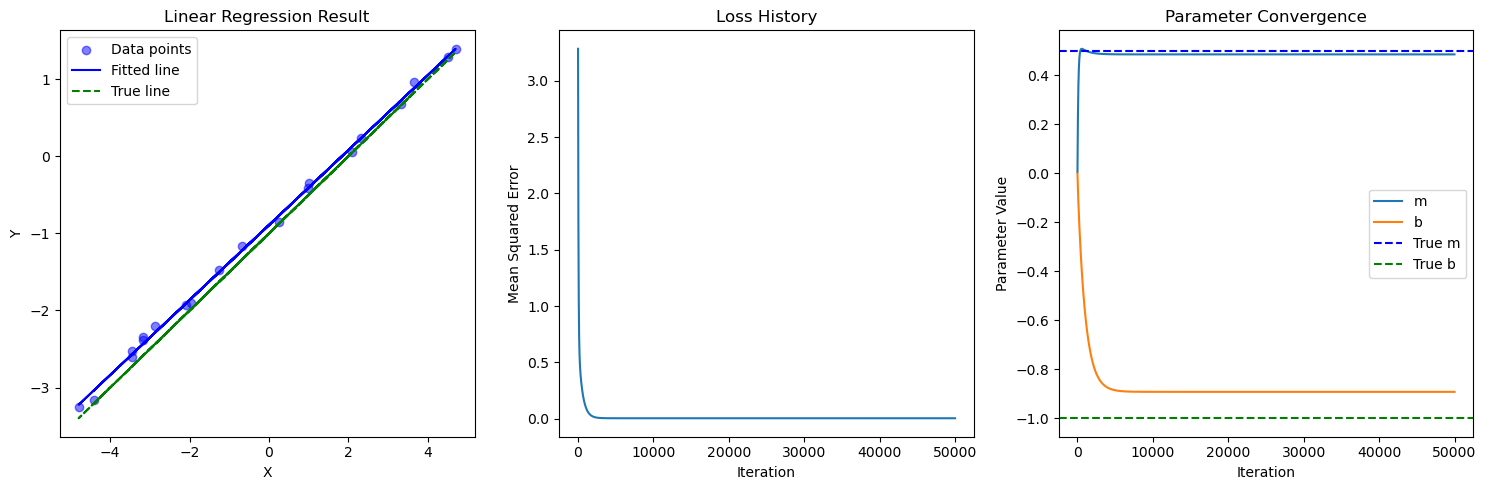

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def Gradient(m, b, X, Y):
    grad_m = 0
    grad_b = 0
    for i in range(len(X)):
        grad_m += -X[i]*(Y[i] - (m*X[i]+b))
        grad_b += -(Y[i] - (m*X[i]+b))
    return grad_m/N, grad_b/N  # Average gradient

# Gradient descent parameters
learning_rate = 0.001
iterations =50000
m = 0  # Initial guess for m
b = 0  # Initial guess for b

# Lists to store parameters history
m_history = []
b_history = []
loss_history = []

# Gradient descent
for i in range(iterations):
    # Calculate gradients
    grad_m, grad_b = Gradient(m, b, X, Y)
    
    # Update parameters
    m = m - learning_rate * grad_m
    b = b - learning_rate * grad_b
    
    # Store parameters
    m_history.append(m)
    b_history.append(b)
    
    # Calculate and store loss
    loss = np.mean((Y - (m*X + b))**2)
    loss_history.append(loss)

print(f"Final parameters: m = {m:.4f}, b = {b:.4f}")
print(f"True parameters: m = 0.5000, b = -1.0000")

# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Data and regression line
plt.subplot(131)
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, m*X + b, color='blue', label='Fitted line')
plt.plot(X, 0.5*X - 1, '--', color='green', label='True line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Result')
plt.legend()

# Plot 2: Loss history
plt.subplot(132)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss History')

# Plot 3: Parameter convergence
plt.subplot(133)
plt.plot(m_history, label='m')
plt.plot(b_history, label='b')
plt.axhline(y=0.5, color='b', linestyle='--', label='True m')
plt.axhline(y=-1, color='g', linestyle='--', label='True b')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Convergence')
plt.legend()

plt.tight_layout()
plt.show()